## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np

%matplotlib inline

In [2]:
IN_DIR = r'E:\hacks-ai\2022.10.Иннополис\agricultural_industry\in\2\\'

In [3]:
PROC_DIR = r'E:\hacks-ai\2022.10.Иннополис\agricultural_industry\proc\\'

In [4]:
OUT_DIR = r'E:\hacks-ai\2022.10.Иннополис\agricultural_industry\out\\'

In [5]:
#df = pd.read_csv("/content/train.csv")
df = pd.read_csv(IN_DIR + "train_dataset_train.csv")

In [6]:
df

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,74,0.028770,0.038282,0.255329,0.148166,0.225421,0.479483,0.071684,0.016856,...,0.001875,0.031995,0.066882,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,6
4826,5191,109,0.035939,0.030722,0.033869,0.029646,0.318387,0.247905,0.265180,0.286298,...,0.192014,0.255964,0.131357,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,6
4827,5226,58,0.191255,0.063581,0.140111,0.323984,0.000000,0.005056,0.092693,0.399439,...,0.085006,0.187352,0.142930,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,6
4828,5390,14,0.291399,0.221428,0.007247,0.055074,0.057781,0.187749,0.112403,0.183555,...,0.536825,0.644357,0.085861,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5


In [8]:
(df.id.value_counts()==1).sum()

4830

In [9]:
(df.id.value_counts()==1).sum() == df.shape[0]

True

In [11]:
df.groupby('crop').count()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
crop,,,,,,,,,,,,,,,,,,,,,
0,726,726,726,726,726,726,726,726,726,726,...,726,726,726,726,726,726,726,726,726,726
1,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700
2,697,697,697,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
3,655,655,655,655,655,655,655,655,655,655,...,655,655,655,655,655,655,655,655,655,655
4,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
5,668,668,668,668,668,668,668,668,668,668,...,668,668,668,668,668,668,668,668,668,668
6,666,666,666,666,666,666,666,666,666,666,...,666,666,666,666,666,666,666,666,666,666


In [9]:
df_test = pd.read_csv(IN_DIR + "test_dataset_test.csv")

In [10]:
df_test

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.000000,0.039850,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000
2,3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,0.031273,...,0.076965,0.045298,0.000000,0.114008,0.059159,0.058423,0.108990,0.237742,0.000000,0.000000
4,3102,53,0.000000,0.234954,0.000000,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.000000,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,0.000000,0.017866,0.212560,0.231169,0.012535,0.000000,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,0.000000,0.000000,0.000000,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.000000,0.545505,...,0.203868,0.031249,0.000000,0.000000,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,0.000000,0.000000,0.000000,0.053296,0.200393,0.000000,0.040434,0.037837,0.000000,0.165996


## Рассмотрим датасет по ближе

In [222]:
print(df.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


In [8]:
df.head(3)

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,1612,40,0.159413,0.251090,0.28886,0.039673,0.301931,0.000000,0.274627,0.079860,...,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5
1,978,75,0.231795,0.260749,0.30419,0.483102,0.213664,0.190464,0.342645,0.000000,...,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597,0
2,3050,75,0.000000,0.176574,0.00000,0.291817,0.352851,0.024589,0.000000,0.345859,...,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4898 non-null   int64  
 1   area                4898 non-null   int64  
 2   nd_mean_2021-04-15  4898 non-null   float64
 3   nd_mean_2021-04-16  4898 non-null   float64
 4   nd_mean_2021-04-18  4898 non-null   float64
 5   nd_mean_2021-04-22  4898 non-null   float64
 6   nd_mean_2021-04-26  4898 non-null   float64
 7   nd_mean_2021-04-28  4898 non-null   float64
 8   nd_mean_2021-04-30  4898 non-null   float64
 9   nd_mean_2021-05-01  4898 non-null   float64
 10  nd_mean_2021-05-02  4898 non-null   float64
 11  nd_mean_2021-05-08  4898 non-null   float64
 12  nd_mean_2021-05-15  4898 non-null   float64
 13  nd_mean_2021-05-16  4898 non-null   float64
 14  nd_mean_2021-05-17  4898 non-null   float64
 15  nd_mean_2021-05-26  4898 non-null   float64
 16  nd_mea

In [10]:
# target crop идёт без пропусков от 0 до 6
df.crop.unique()

array([5, 0, 6, 1, 2, 3, 4], dtype=int64)

Рассмотрим единственный не числовой столбец

In [11]:
df.select_dtypes(include=['object'])

,.geo
0,"{""type"":""Polygon"",""coordinates"":[[[49.33090116..."
1,"{""type"":""Polygon"",""coordinates"":[[[41.41193007..."
2,"{""type"":""Polygon"",""coordinates"":[[[40.88636263..."
3,"{""type"":""Polygon"",""coordinates"":[[[33.86367532..."
4,"{""type"":""Polygon"",""coordinates"":[[[56.31367947..."
...,...
4893,"{""type"":""Polygon"",""coordinates"":[[[34.97927998..."
4894,"{""type"":""Polygon"",""coordinates"":[[[45.02292349..."
4895,"{""type"":""Polygon"",""coordinates"":[[[45.37757811..."
4896,"{""type"":""Polygon"",""coordinates"":[[[62.80767351..."


Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

<AxesSubplot:>

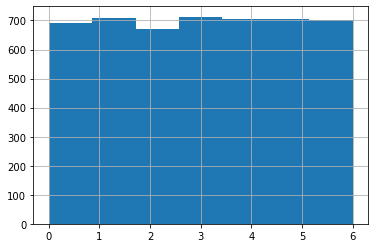

In [12]:
df["crop"].hist(bins = 7)

Заметен слабый разброс популярности категориий

In [13]:
df["crop"].value_counts()

3    713
1    707
5    706
4    705
6    703
0    693
2    671
Name: crop, dtype: int64

Посмотрим на разброс площади полей

<AxesSubplot:xlabel='area', ylabel='count'>

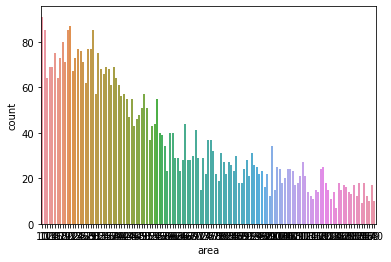

In [14]:
sns.countplot(x = "area" , data  = df)  

Постараемся найти закономерность

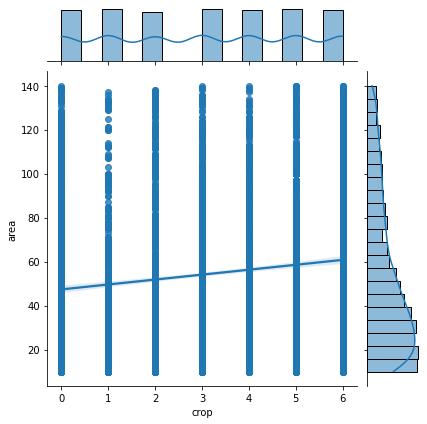

In [15]:
sns.jointplot(x = "crop", y = 'area', data = df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

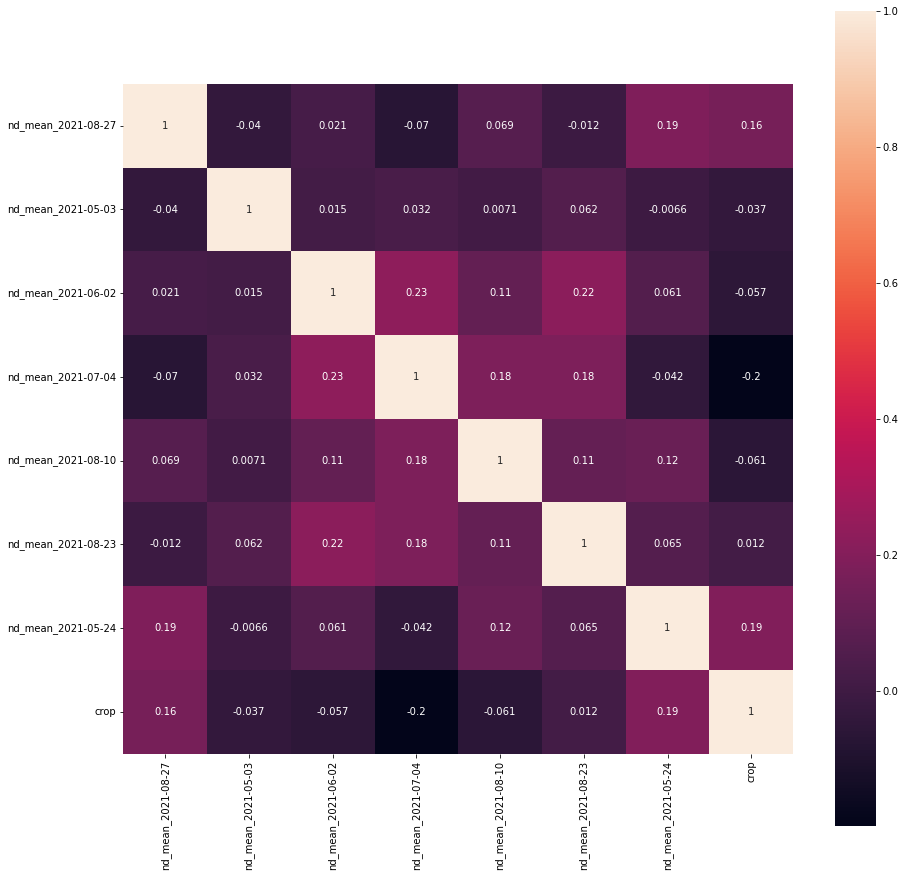

In [16]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [17]:
X = df.drop(["id",".geo", "crop"], axis = 1)
y = df[["crop"]]

In [18]:
X.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,40,0.159413,0.251090,0.288860,0.039673,0.301931,0.000000,0.274627,0.079860,0.142140,...,0.651197,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304
1,75,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.000000,0.396637,...,0.353390,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597
2,75,0.000000,0.176574,0.000000,0.291817,0.352851,0.024589,0.000000,0.345859,0.145083,...,0.031849,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719
3,55,0.000000,0.317001,0.267246,0.000000,0.265689,0.038065,0.000000,0.533367,0.276083,...,0.009670,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017
4,25,0.083827,0.000000,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,...,0.072474,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945


## Обучение модели

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
clf = RandomForestClassifier(random_state=0, n_estimators = 3)

In [21]:
clf.fit(X_train, y_train)

e:\temp/ipykernel_19372/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3, random_state=0)

## Оценка точности

In [22]:
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=3, random_state=0) 
 0.6559326854718475


In [23]:
clf_test = RandomForestClassifier(random_state=0, n_estimators = 3)

In [24]:
clf_test.fit(X, y)

e:\temp/ipykernel_19372/3999952307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_test.fit(X, y)


RandomForestClassifier(n_estimators=3, random_state=0)

In [25]:
X_test = df_test.drop(["id",".geo"], axis = 1)

In [26]:
pred_test = clf_test.predict(X_test)

In [27]:
pred_test

array([2, 2, 3, ..., 3, 0, 2], dtype=int64)

In [28]:
df_test['id']

0       3961
1        811
2       2471
3       3950
4        414
        ... 
2095    5201
2096    5465
2097    6640
2098    2402
2099    5078
Name: id, Length: 2100, dtype: int64

In [29]:
#Сохраняем в csv файл
pd.DataFrame({'id': df_test['id'],
                'crop': np.squeeze(pred_test.astype(int))}).to_csv(
                OUT_DIR + 'agro_baseline.csv', sep=',', index=None)

# Обработка пропусков

In [30]:
df_test

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,3961,15,0.570259,0.311567,0.158459,0.000000,0.410445,0.000000,0.268443,0.000000,...,0.112668,0.000000,0.508451,0.473916,0.000000,0.225841,0.000000,0.095615,0.000000,0.377496
1,811,13,0.099120,0.120262,0.058465,0.512710,0.498558,0.216236,0.419240,0.266971,...,0.011926,0.312531,0.000000,0.491863,0.295682,0.212321,0.143153,0.285811,0.089097,0.463397
2,2471,33,0.284628,0.270622,0.306984,0.358121,0.171494,0.355236,0.265694,0.015629,...,0.000000,0.696087,0.381593,0.334549,0.130732,0.098730,0.000000,0.000000,0.000000,0.017715
3,3950,26,0.000000,0.134871,0.031266,0.071576,0.265254,0.393184,0.288366,0.228679,...,0.378901,0.078180,0.260400,0.000000,0.000000,0.520998,0.105649,0.192649,0.039076,0.000000
4,414,33,0.274234,0.247413,0.334272,0.135544,0.053176,0.019014,0.337644,0.319347,...,0.218645,0.020747,0.000000,0.086551,0.000000,0.057502,0.188022,0.000000,0.074508,0.272411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,5201,26,0.000000,0.260753,0.006954,0.120993,0.467033,0.445326,0.146015,0.063204,...,0.000000,0.223751,0.210844,0.517039,0.088939,0.241273,0.320513,0.086228,0.148027,0.027976
2096,5465,45,0.218513,0.060567,0.285673,0.117278,0.056938,0.199099,0.015916,0.419855,...,0.000000,0.090219,0.014709,0.193550,0.483700,0.000000,0.735950,0.215911,0.718564,0.292793
2097,6640,48,0.008660,0.222891,0.475024,0.507930,0.305147,0.360971,0.000000,0.300393,...,0.037657,0.000000,0.148410,0.283431,0.377793,0.400217,0.259843,0.062095,0.270994,0.523561
2098,2402,133,0.026481,0.289413,0.249596,0.243610,0.183115,0.286295,0.141304,0.266499,...,0.155262,0.000000,0.315290,0.303863,0.000000,0.176415,0.287135,0.299178,0.224451,0.006830


In [31]:
df_test.iloc[:10, 2]

0    0.570259
1    0.099120
2    0.284628
3    0.000000
4    0.274234
5    0.208867
6    0.318802
7    0.000000
8    0.056263
9    0.314163
Name: nd_mean_2021-04-15, dtype: float64

In [70]:
df_test.columns

Index(['id', 'area', 'nd_mean_2021-04-15', 'nd_mean_2021-04-16',
       'nd_mean_2021-04-18', 'nd_mean_2021-04-22', 'nd_mean_2021-04-26',
       'nd_mean_2021-04-28', 'nd_mean_2021-04-30', 'nd_mean_2021-05-01',
       'nd_mean_2021-05-02', 'nd_mean_2021-05-08', 'nd_mean_2021-05-15',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-26',
       'nd_mean_2021-05-27', 'nd_mean_2021-05-29', 'nd_mean_2021-06-07',
       'nd_mean_2021-06-18', 'nd_mean_2021-06-19', 'nd_mean_2021-06-20',
       'nd_mean_2021-06-22', 'nd_mean_2021-06-25', 'nd_mean_2021-06-27',
       'nd_mean_2021-07-07', 'nd_mean_2021-07-08', 'nd_mean_2021-07-09',
       'nd_mean_2021-07-13', 'nd_mean_2021-07-15', 'nd_mean_2021-07-17',
       'nd_mean_2021-07-20', 'nd_mean_2021-07-26', 'nd_mean_2021-07-27',
       'nd_mean_2021-07-29', 'nd_mean_2021-07-31', 'nd_mean_2021-08-01',
       'nd_mean_2021-08-07', 'nd_mean_2021-08-12', '.geo',
       'nd_mean_2021-04-19', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',


In [12]:
# @link https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
#df_test.loc[:,df_test.columns.str.contains('nd_mean')]

df_test.columns.str.contains('nd_mean')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [13]:
ts_cols =[x for x in df_test.columns[df_test.columns.str.contains('nd_mean')].sort_values()]
ts_cols

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27',
 'nd_mean_2021-04-28',
 'nd_mean_2021-04-29',
 'nd_mean_2021-04-30',
 'nd_mean_2021-05-01',
 'nd_mean_2021-05-02',
 'nd_mean_2021-05-03',
 'nd_mean_2021-05-04',
 'nd_mean_2021-05-07',
 'nd_mean_2021-05-08',
 'nd_mean_2021-05-09',
 'nd_mean_2021-05-10',
 'nd_mean_2021-05-15',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-19',
 'nd_mean_2021-05-20',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-24',
 'nd_mean_2021-05-26',
 'nd_mean_2021-05-27',
 'nd_mean_2021-05-29',
 'nd_mean_2021-06-02',
 'nd_mean_2021-06-03',
 'nd_mean_2021-06-04',
 'nd_mean_2021-06-05',
 'nd_mean_2021-06-06',
 'nd_mean_2021-06-07',
 'nd_mean_2021-06-09',
 'nd_mean_2021-06-10',
 'nd_mean_2021-06-12',
 'nd_mean_2021-06-13',
 'nd_mean_2021-06-16',
 'nd_mean_2021-06-18',
 'nd_mean_2

In [14]:
df_test.loc[:, ts_cols]

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,0.083038,0.196691,0.244827,0.000000,0.241219,0.259303,0.064947,0.066446,0.052522,0.153113,...,0.719171,0.000000,0.593911,0.000000,0.000000,0.192016,0.164840,0.714292,0.065030,0.084197
1,0.122470,0.091192,0.241003,0.000000,0.181600,0.125823,0.108175,0.081871,0.000000,0.183747,...,0.317670,0.329803,0.000000,0.007428,0.000000,0.106484,0.167479,0.000000,0.000000,0.108945
2,0.259347,0.000000,0.297489,0.033368,0.000000,0.285057,0.374026,0.000000,0.028275,0.261710,...,0.534127,0.000000,0.549128,0.000000,0.026141,0.469352,0.477381,0.037838,0.000000,0.158279
3,0.166209,0.111243,0.000000,0.201012,0.083885,0.000000,0.015033,0.065305,0.000000,0.096765,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,0.010862,0.000000,0.067479,0.234954,0.000000,0.000000,0.000000,0.103583,0.305964,0.067257,...,0.000000,0.134136,0.780305,0.030224,0.046893,0.000000,0.779191,0.048622,0.650742,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.225092,0.000000,0.188515,0.017866,0.099791,0.212560,0.000000,0.000000,0.231169,0.211315,...,0.106541,0.098764,0.000000,0.030232,0.094177,0.193355,0.023358,0.077803,0.367456,0.112885
2067,0.288768,0.010670,0.283976,0.105135,0.308051,0.170843,0.010864,0.042084,0.227927,0.000000,...,0.678491,0.014447,0.666201,0.073079,0.060584,0.589452,0.546666,0.572680,0.152172,0.511447
2068,0.000000,0.131978,0.000000,0.058492,0.000000,0.607262,0.254509,0.094083,0.389112,0.107997,...,0.467865,0.372719,0.173248,0.316167,0.019092,0.075738,0.183048,0.008488,0.179656,0.076760
2069,0.000000,0.044726,0.034510,0.093328,0.126618,0.188758,0.097723,0.244018,0.290000,0.276024,...,0.772975,0.761113,0.150573,0.678626,0.000000,0.052762,0.664203,0.040434,0.046549,0.037837


In [15]:
ts_date_str_cols =[x.replace('nd_mean_', '')
                   for x in df_test.columns[df_test.columns.str.contains('nd_mean')].sort_values()]
ts_date_str_cols

['2021-04-15',
 '2021-04-16',
 '2021-04-18',
 '2021-04-19',
 '2021-04-20',
 '2021-04-22',
 '2021-04-23',
 '2021-04-25',
 '2021-04-26',
 '2021-04-27',
 '2021-04-28',
 '2021-04-29',
 '2021-04-30',
 '2021-05-01',
 '2021-05-02',
 '2021-05-03',
 '2021-05-04',
 '2021-05-07',
 '2021-05-08',
 '2021-05-09',
 '2021-05-10',
 '2021-05-15',
 '2021-05-16',
 '2021-05-17',
 '2021-05-19',
 '2021-05-20',
 '2021-05-21',
 '2021-05-24',
 '2021-05-26',
 '2021-05-27',
 '2021-05-29',
 '2021-06-02',
 '2021-06-03',
 '2021-06-04',
 '2021-06-05',
 '2021-06-06',
 '2021-06-07',
 '2021-06-09',
 '2021-06-10',
 '2021-06-12',
 '2021-06-13',
 '2021-06-16',
 '2021-06-18',
 '2021-06-19',
 '2021-06-20',
 '2021-06-22',
 '2021-06-25',
 '2021-06-27',
 '2021-06-28',
 '2021-07-04',
 '2021-07-05',
 '2021-07-07',
 '2021-07-08',
 '2021-07-09',
 '2021-07-13',
 '2021-07-15',
 '2021-07-17',
 '2021-07-20',
 '2021-07-26',
 '2021-07-27',
 '2021-07-29',
 '2021-07-31',
 '2021-08-01',
 '2021-08-07',
 '2021-08-10',
 '2021-08-11',
 '2021-08-

In [16]:
from datetime import datetime
ts_date_list = [datetime.strptime(date_string, '%Y-%m-%d') for date_string in ts_date_str_cols]
ts_date_list

[datetime.datetime(2021, 4, 15, 0, 0),
 datetime.datetime(2021, 4, 16, 0, 0),
 datetime.datetime(2021, 4, 18, 0, 0),
 datetime.datetime(2021, 4, 19, 0, 0),
 datetime.datetime(2021, 4, 20, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 23, 0, 0),
 datetime.datetime(2021, 4, 25, 0, 0),
 datetime.datetime(2021, 4, 26, 0, 0),
 datetime.datetime(2021, 4, 27, 0, 0),
 datetime.datetime(2021, 4, 28, 0, 0),
 datetime.datetime(2021, 4, 29, 0, 0),
 datetime.datetime(2021, 4, 30, 0, 0),
 datetime.datetime(2021, 5, 1, 0, 0),
 datetime.datetime(2021, 5, 2, 0, 0),
 datetime.datetime(2021, 5, 3, 0, 0),
 datetime.datetime(2021, 5, 4, 0, 0),
 datetime.datetime(2021, 5, 7, 0, 0),
 datetime.datetime(2021, 5, 8, 0, 0),
 datetime.datetime(2021, 5, 9, 0, 0),
 datetime.datetime(2021, 5, 10, 0, 0),
 datetime.datetime(2021, 5, 15, 0, 0),
 datetime.datetime(2021, 5, 16, 0, 0),
 datetime.datetime(2021, 5, 17, 0, 0),
 datetime.datetime(2021, 5, 19, 0, 0),
 datetime.datetime(2021, 5, 20, 

In [17]:
ts_day_diff = [(dt-ts_date_list[0]).days for dt in ts_date_list]
ts_day_diff

[0,
 1,
 3,
 4,
 5,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 25,
 30,
 31,
 32,
 34,
 35,
 36,
 39,
 41,
 42,
 44,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 62,
 64,
 65,
 66,
 68,
 71,
 73,
 74,
 80,
 81,
 83,
 84,
 85,
 89,
 91,
 93,
 96,
 102,
 103,
 105,
 107,
 108,
 114,
 117,
 118,
 119,
 120,
 130,
 134]

In [18]:
import matplotlib.pyplot as plt

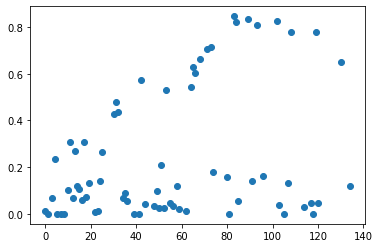

In [19]:
plt.scatter(ts_day_diff, df_test.loc[4, ts_cols])

<AxesSubplot:>

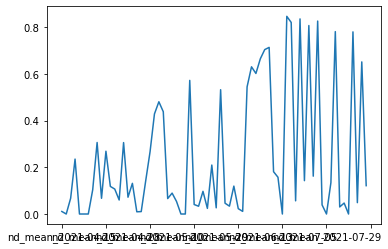

In [20]:
df_test.loc[4, ts_cols].plot()

In [21]:
_moving_average = df_test.loc[1, ts_cols].rolling(
    window=8,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=4,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

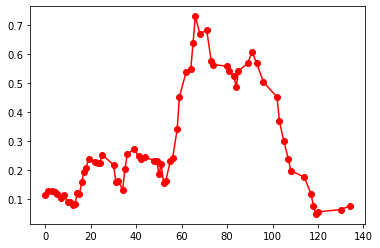

In [22]:
plt.plot(ts_day_diff, _moving_average, 'r-o')
plt.show()

In [23]:
linear_interpolation = df_test.loc[1, ts_cols].interpolate(method='linear')

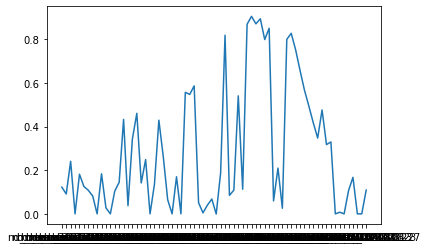

In [24]:
plt.plot(linear_interpolation)

In [212]:
(df_test.loc[:, ts_cols]>1).sum().sum()

0

In [213]:
(df_test.loc[:, ts_cols]<=0).sum().sum()

17901

In [214]:
(df.loc[:, ts_cols]>1).sum().sum()

0

In [215]:
(df.loc[:, ts_cols]<=0).sum().sum()

42006

# Обработка данных
## Упорядочивание столбцов по возрастанию даты
## Замена экстремумов <0 и >= 1 на Nan
## Линейная интерполяция данных
## Добавление интегрального признака суммы всех значений, делённого на количество дней

In [25]:
# Одинаковый ли список столбцов с данными по времени?
[x for x in df.columns[df.columns.str.contains('nd_mean')].sort_values()] == \
[x for x in df_test.columns[df_test.columns.str.contains('nd_mean')].sort_values()]

True

In [26]:
ts_cols =[x for x in df_test.columns[df_test.columns.str.contains('nd_mean')].sort_values()]
ts_cols[:10]

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27']

In [27]:
df_ts_lin_interp = df[ts_cols].copy()
df_ts_lin_interp.columns

Index(['nd_mean_2021-04-15', 'nd_mean_2021-04-16', 'nd_mean_2021-04-18',
       'nd_mean_2021-04-19', 'nd_mean_2021-04-20', 'nd_mean_2021-04-22',
       'nd_mean_2021-04-23', 'nd_mean_2021-04-25', 'nd_mean_2021-04-26',
       'nd_mean_2021-04-27', 'nd_mean_2021-04-28', 'nd_mean_2021-04-29',
       'nd_mean_2021-04-30', 'nd_mean_2021-05-01', 'nd_mean_2021-05-02',
       'nd_mean_2021-05-03', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',
       'nd_mean_2021-05-08', 'nd_mean_2021-05-09', 'nd_mean_2021-05-10',
       'nd_mean_2021-05-15', 'nd_mean_2021-05-16', 'nd_mean_2021-05-17',
       'nd_mean_2021-05-19', 'nd_mean_2021-05-20', 'nd_mean_2021-05-21',
       'nd_mean_2021-05-24', 'nd_mean_2021-05-26', 'nd_mean_2021-05-27',
       'nd_mean_2021-05-29', 'nd_mean_2021-06-02', 'nd_mean_2021-06-03',
       'nd_mean_2021-06-04', 'nd_mean_2021-06-05', 'nd_mean_2021-06-06',
       'nd_mean_2021-06-07', 'nd_mean_2021-06-09', 'nd_mean_2021-06-10',
       'nd_mean_2021-06-12', 'nd_mean_2021-06-13', 

In [28]:
df_test_ts_lin_interp = df_test[ts_cols].copy()
df_test_ts_lin_interp.columns

Index(['nd_mean_2021-04-15', 'nd_mean_2021-04-16', 'nd_mean_2021-04-18',
       'nd_mean_2021-04-19', 'nd_mean_2021-04-20', 'nd_mean_2021-04-22',
       'nd_mean_2021-04-23', 'nd_mean_2021-04-25', 'nd_mean_2021-04-26',
       'nd_mean_2021-04-27', 'nd_mean_2021-04-28', 'nd_mean_2021-04-29',
       'nd_mean_2021-04-30', 'nd_mean_2021-05-01', 'nd_mean_2021-05-02',
       'nd_mean_2021-05-03', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',
       'nd_mean_2021-05-08', 'nd_mean_2021-05-09', 'nd_mean_2021-05-10',
       'nd_mean_2021-05-15', 'nd_mean_2021-05-16', 'nd_mean_2021-05-17',
       'nd_mean_2021-05-19', 'nd_mean_2021-05-20', 'nd_mean_2021-05-21',
       'nd_mean_2021-05-24', 'nd_mean_2021-05-26', 'nd_mean_2021-05-27',
       'nd_mean_2021-05-29', 'nd_mean_2021-06-02', 'nd_mean_2021-06-03',
       'nd_mean_2021-06-04', 'nd_mean_2021-06-05', 'nd_mean_2021-06-06',
       'nd_mean_2021-06-07', 'nd_mean_2021-06-09', 'nd_mean_2021-06-10',
       'nd_mean_2021-06-12', 'nd_mean_2021-06-13', 

In [29]:
#[df.columns[~df.columns.isin(ts_cols)].join(df.columns[df.columns.isin(ts_cols)], how='outer', sort=False)]

In [30]:
ts_date_str_cols =[x.replace('nd_mean_', '')
                   for x in df_test.columns[df_test.columns.str.contains('nd_mean')].sort_values()]
ts_date_str_cols[:10]

['2021-04-15',
 '2021-04-16',
 '2021-04-18',
 '2021-04-19',
 '2021-04-20',
 '2021-04-22',
 '2021-04-23',
 '2021-04-25',
 '2021-04-26',
 '2021-04-27']

In [31]:
from datetime import datetime
ts_date_list = [datetime.strptime(date_string, '%Y-%m-%d') for date_string in ts_date_str_cols]
ts_date_list[:10]

[datetime.datetime(2021, 4, 15, 0, 0),
 datetime.datetime(2021, 4, 16, 0, 0),
 datetime.datetime(2021, 4, 18, 0, 0),
 datetime.datetime(2021, 4, 19, 0, 0),
 datetime.datetime(2021, 4, 20, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 23, 0, 0),
 datetime.datetime(2021, 4, 25, 0, 0),
 datetime.datetime(2021, 4, 26, 0, 0),
 datetime.datetime(2021, 4, 27, 0, 0)]

In [32]:
ts_day_diff = [(dt-ts_date_list[0]).days for dt in ts_date_list]
ts_day_diff[:10]

[0, 1, 3, 4, 5, 7, 8, 10, 11, 12]

In [33]:
# Заменяем экстремумы на nan для дальнейшей интерполяции по этим точкам
df_ts_lin_interp.mask((df_ts_lin_interp<=0) | (df_ts_lin_interp >=1), inplace=True)

In [34]:
# Проверка
((df_ts_lin_interp<=0) | (df_ts_lin_interp >=1)).sum().sum()

0

In [35]:
# То же для тестовых данных
df_test_ts_lin_interp.mask((df_test_ts_lin_interp<=0) | (df_test_ts_lin_interp >=1), inplace=True)

In [36]:
((df_test_ts_lin_interp<=0) | (df_test_ts_lin_interp >=1)).sum().sum()

0

In [37]:
date_all_range = pd.date_range(start='2021-04-15', end='2021-08-27')

In [38]:
date_all_cols = ['nd_mean_' + dt.strftime('%Y-%m-%d') for dt in date_all_range]
date_all_cols

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-17',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-21',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-24',
 'nd_mean_2021-04-25',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-27',
 'nd_mean_2021-04-28',
 'nd_mean_2021-04-29',
 'nd_mean_2021-04-30',
 'nd_mean_2021-05-01',
 'nd_mean_2021-05-02',
 'nd_mean_2021-05-03',
 'nd_mean_2021-05-04',
 'nd_mean_2021-05-05',
 'nd_mean_2021-05-06',
 'nd_mean_2021-05-07',
 'nd_mean_2021-05-08',
 'nd_mean_2021-05-09',
 'nd_mean_2021-05-10',
 'nd_mean_2021-05-11',
 'nd_mean_2021-05-12',
 'nd_mean_2021-05-13',
 'nd_mean_2021-05-14',
 'nd_mean_2021-05-15',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-18',
 'nd_mean_2021-05-19',
 'nd_mean_2021-05-20',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-22',
 'nd_mean_2021-05-23',
 'nd_mean_2021-05-24',
 'nd_mean_2021-05-25',
 'nd_mean_2021-05-26',
 'nd_mean_2021-05-27',
 'nd_mean_2

In [40]:
df_ts_lin_interp.shape[0]

4830

In [41]:
df_out = pd.DataFrame(np.nan,
                      index = list(range(df_ts_lin_interp.shape[0])),
                      columns=date_all_cols)

df_out

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_test_out = pd.DataFrame(np.nan,
                           index = list(range(df_test_ts_lin_interp.shape[0])),
                           columns=date_all_cols)

df_test_out

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_ts_lin_interp.iloc[:3,:]

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,NaN,0.077577,0.104442,0.000476,...,0.727516,NaN,0.754859,NaN,0.030883,NaN,0.658016,0.126832,0.034858,0.614770
1,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,0.196361,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,NaN,0.179612
2,0.006391,0.013679,NaN,0.007055,NaN,0.120804,0.112471,0.041751,0.037839,0.169020,...,0.321827,0.411168,NaN,0.357296,0.045370,0.172080,NaN,0.090607,NaN,0.054127


In [49]:
ts_init_dict = {k:np.nan for k in range(max(ts_day_diff) + 1)}
ts_init_dict[3]

nan

In [50]:
for ind, row in enumerate(df_ts_lin_interp.to_numpy()):
    ts_row_dict = dict(zip(ts_day_diff, list(row)))
    ts_merged = {**ts_init_dict, **ts_row_dict}
    linear_interpolation = pd.Series(ts_merged).interpolate(method='linear').bfill()
    df_out.iloc[ind, :] = linear_interpolation

In [51]:
df_out

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151


In [52]:
df_out.to_csv(PROC_DIR + 'train_lin_interp.csv', sep=',')

<AxesSubplot:>

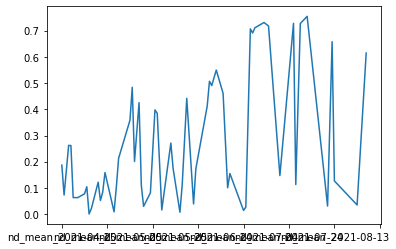

In [54]:
df_out.loc[0,:].plot()

In [330]:
df.shape

(4830, 74)

In [356]:
df_out.isna().sum().sum()

0

In [355]:
df_test_out.isna().sum().sum()

0

In [57]:
for ind, row in enumerate(df_test_ts_lin_interp.to_numpy()):
    ts_row_dict = dict(zip(ts_day_diff, list(row)))
    ts_merged = {**ts_init_dict, **ts_row_dict}
    linear_interpolation = pd.Series(ts_merged).interpolate(method='linear').bfill()
    df_test_out.iloc[ind, :] = linear_interpolation

In [58]:
df_test_out.head(40)

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,0.064947,0.065696,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,0.108175,0.095023,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,0.374026,0.258776,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,0.015033,0.040169,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,0.147373,0.125478,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
5,0.079736,0.111598,0.106344,0.101091,0.050261,0.124638,0.120251,0.115864,0.159296,0.113913,...,0.174904,0.155791,0.136679,0.117566,0.098454,0.079341,0.060229,0.041116,0.022004,0.002891
6,0.232567,0.194653,0.156740,0.118827,0.279388,0.090533,0.092733,0.094934,0.131233,0.167533,...,0.142498,0.122426,0.102354,0.082281,0.062209,0.042136,0.041552,0.040968,0.040384,0.039800
7,0.164256,0.195982,0.109641,0.023300,0.174281,0.144221,0.220729,0.297237,0.253259,0.209282,...,0.110671,0.106728,0.102785,0.098843,0.094900,0.090958,0.120402,0.149845,0.179289,0.208732
8,0.209354,0.138275,0.097820,0.057365,0.016459,0.226187,0.156532,0.086877,0.160924,0.181278,...,0.218905,0.223379,0.227853,0.232327,0.236801,0.241275,0.192270,0.143265,0.094260,0.045255
9,0.102678,0.102678,0.102678,0.102678,0.047002,0.057442,0.167432,0.277422,0.026652,0.043085,...,0.112933,0.104371,0.095810,0.087248,0.078687,0.070125,0.072754,0.075383,0.078012,0.080641


In [59]:
df_test_out.to_csv(OUT_DIR + 'test_lin_interp.csv', sep=',')

In [60]:
df_test_out.shape

(2071, 135)

In [340]:
df_test.shape

(2071, 73)

In [312]:
ts_day_diff

[0,
 1,
 3,
 4,
 5,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 25,
 30,
 31,
 32,
 34,
 35,
 36,
 39,
 41,
 42,
 44,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 62,
 64,
 65,
 66,
 68,
 71,
 73,
 74,
 80,
 81,
 83,
 84,
 85,
 89,
 91,
 93,
 96,
 102,
 103,
 105,
 107,
 108,
 114,
 117,
 118,
 119,
 120,
 130,
 134]

In [290]:
max(ts_day_diff)

134

In [ ]:
np.array(df_test.loc[1, ts_cols].mask(df_test.loc[1, ts_cols]==0))

In [152]:
np.array(df_test.loc[1, ts_cols].mask(df_test.loc[1, ts_cols]==0))

array([0.0991200590983075, 0.1202620527405982, 0.0584647154076476,
       0.3886451616622685, 0.1932631337612589, 0.5127097625624049,
       0.04658362514595, 0.2473420578587287, 0.4985583980682747, nan,
       0.216236472815408, nan, 0.4192401941822763, 0.2669711122346179,
       0.4420124841572044, 0.2956820229369771, 0.0365062046212438,
       0.3897858876310173, 0.1219507677919479, 0.01987136141181,
       0.2027293438590544, 0.3516694217027368, 0.5967447145418686,
       0.7027828471227126, 0.3491341819224002, 0.0203495877904579,
       0.250605569486248, 0.4633968454355345, 0.1836845693976381,
       0.1675813166241764, nan, 0.2123206750732293, 0.0259204561664656,
       0.2594630970288319, 0.3200765784708087, 0.1660828935117385,
       0.4621755061798022, 0.441471326785157, 0.0119258240851681, nan,
       0.6124899983406067, 0.7657782167469689, 0.7714991119774905,
       0.6433554530143737, 0.6822368464686653, 0.6718047477982261,
       0.7342278805646029, 0.0536535226152626, na

In [145]:
day_diff_range = list(range(135))
day_diff_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134]

In [148]:
ts_init = [np.nan]*len(day_diff_range)
ts_init

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [15]:
df_test_ = df_test.copy()

In [149]:
ts_null_ser = pd.Series(data=ts_init, index=day_diff_range)
ts_null_ser

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
130   NaN
131   NaN
132   NaN
133   NaN
134   NaN
Length: 135, dtype: float64

In [154]:
ts_samp_ser = pd.Series(data=np.array(df_test.loc[1, ts_cols].mask(df_test.loc[1, ts_cols]==0)),
                       index=ts_day_diff)
ts_samp_ser

0       0.09912
1      0.120262
3      0.058465
4      0.388645
5      0.193263
         ...   
118    0.093282
119    0.760639
120         NaN
130    0.089097
134    0.491863
Length: 70, dtype: object

<AxesSubplot:>

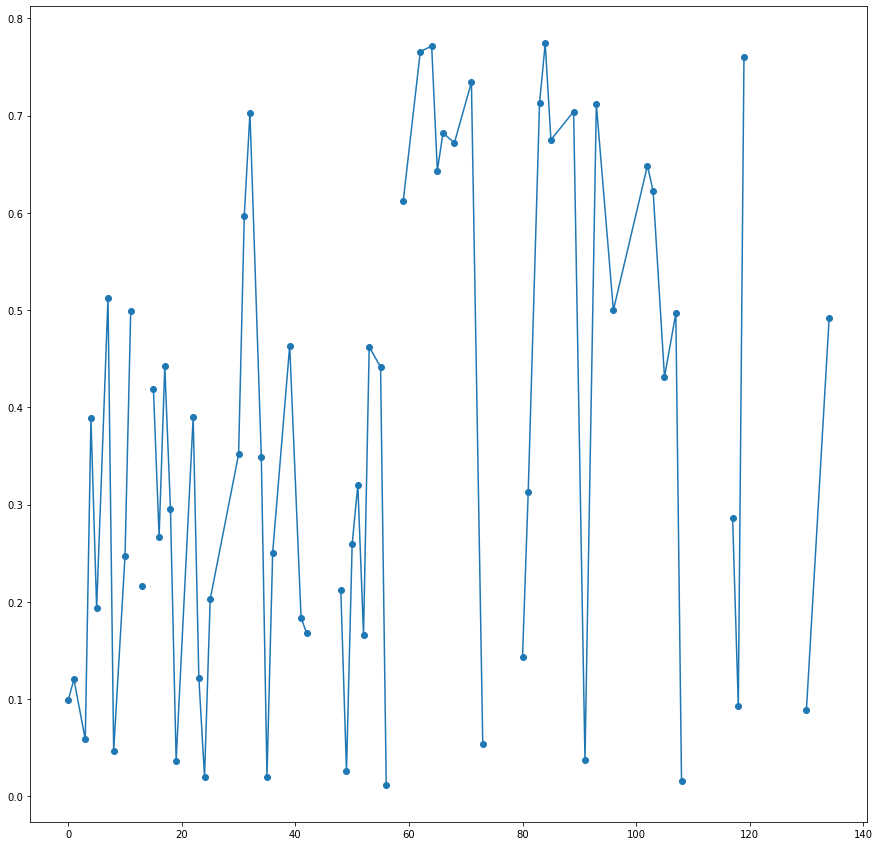

In [159]:
ts_samp_ser.plot(marker='o')

In [171]:
# Нэт, это не merge!
ts_merged = pd.concat([ts_samp_ser, ts_null_ser], axis=1, join='inner')
ts_merged

,0,1
0,0.09912,NaN
1,0.120262,NaN
3,0.058465,NaN
4,0.388645,NaN
5,0.193263,NaN
...,...,...
118,0.093282,NaN
119,0.760639,NaN
120,NaN,NaN
130,0.089097,NaN


In [175]:
_=pd.merge(ts_null_ser, ts_samp_ser, how='inner', on=ts_null_ser.index)
_

ValueError: Cannot merge a Series without a name

In [169]:
ts_merged.shape

(205,)

In [176]:
ts_init_dict = {k:np.nan for k in range(135)}
ts_init_dict

{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: nan,
 11: nan,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: nan,
 49: nan,
 50: nan,
 51: nan,
 52: nan,
 53: nan,
 54: nan,
 55: nan,
 56: nan,
 57: nan,
 58: nan,
 59: nan,
 60: nan,
 61: nan,
 62: nan,
 63: nan,
 64: nan,
 65: nan,
 66: nan,
 67: nan,
 68: nan,
 69: nan,
 70: nan,
 71: nan,
 72: nan,
 73: nan,
 74: nan,
 75: nan,
 76: nan,
 77: nan,
 78: nan,
 79: nan,
 80: nan,
 81: nan,
 82: nan,
 83: nan,
 84: nan,
 85: nan,
 86: nan,
 87: nan,
 88: nan,
 89: nan,
 90: nan,
 91: nan,
 92: nan,
 93: nan,
 94: nan,
 95: nan,
 96: nan,
 97: nan,
 98: nan,
 99: nan,
 100: nan,

In [180]:
ts_row_dict = dict(zip(ts_day_diff, list(df_test.loc[1, ts_cols].mask(df_test.loc[1, ts_cols]==0))))
ts_row_dict

{0: 0.0991200590983075,
 1: 0.1202620527405982,
 3: 0.0584647154076476,
 4: 0.3886451616622685,
 5: 0.1932631337612589,
 7: 0.5127097625624049,
 8: 0.04658362514595,
 10: 0.2473420578587287,
 11: 0.4985583980682747,
 12: nan,
 13: 0.216236472815408,
 14: nan,
 15: 0.4192401941822763,
 16: 0.2669711122346179,
 17: 0.4420124841572044,
 18: 0.2956820229369771,
 19: 0.0365062046212438,
 22: 0.3897858876310173,
 23: 0.1219507677919479,
 24: 0.01987136141181,
 25: 0.2027293438590544,
 30: 0.3516694217027368,
 31: 0.5967447145418686,
 32: 0.7027828471227126,
 34: 0.3491341819224002,
 35: 0.0203495877904579,
 36: 0.250605569486248,
 39: 0.4633968454355345,
 41: 0.1836845693976381,
 42: 0.1675813166241764,
 44: nan,
 48: 0.2123206750732293,
 49: 0.0259204561664656,
 50: 0.2594630970288319,
 51: 0.3200765784708087,
 52: 0.1660828935117385,
 53: 0.4621755061798022,
 55: 0.441471326785157,
 56: 0.0119258240851681,
 58: nan,
 59: 0.6124899983406067,
 62: 0.7657782167469689,
 64: 0.7714991119774905,

In [192]:
len(ts_row_dict)-pd.Series(ts_row_dict).isna().sum()

63

In [193]:
ts_merged = {**ts_init_dict, **ts_row_dict}
ts_merged

{0: 0.0991200590983075,
 1: 0.1202620527405982,
 2: nan,
 3: 0.0584647154076476,
 4: 0.3886451616622685,
 5: 0.1932631337612589,
 6: nan,
 7: 0.5127097625624049,
 8: 0.04658362514595,
 9: nan,
 10: 0.2473420578587287,
 11: 0.4985583980682747,
 12: nan,
 13: 0.216236472815408,
 14: nan,
 15: 0.4192401941822763,
 16: 0.2669711122346179,
 17: 0.4420124841572044,
 18: 0.2956820229369771,
 19: 0.0365062046212438,
 20: nan,
 21: nan,
 22: 0.3897858876310173,
 23: 0.1219507677919479,
 24: 0.01987136141181,
 25: 0.2027293438590544,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: 0.3516694217027368,
 31: 0.5967447145418686,
 32: 0.7027828471227126,
 33: nan,
 34: 0.3491341819224002,
 35: 0.0203495877904579,
 36: 0.250605569486248,
 37: nan,
 38: nan,
 39: 0.4633968454355345,
 40: nan,
 41: 0.1836845693976381,
 42: 0.1675813166241764,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: 0.2123206750732293,
 49: 0.0259204561664656,
 50: 0.2594630970288319,
 51: 0.3200765784708087,
 52: 0.166082893

In [196]:
135 - pd.Series(ts_merged).isna().sum()

63

<AxesSubplot:>

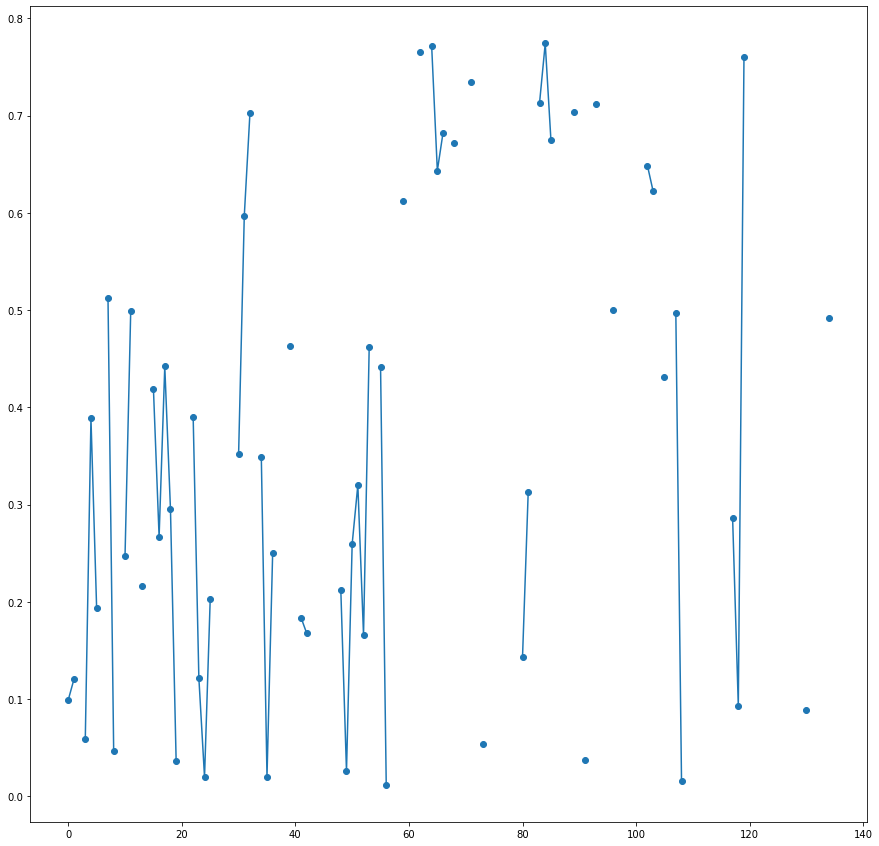

In [201]:
pd.Series(ts_merged).plot(marker='o')

In [203]:
linear_interpolation = pd.Series(ts_merged).interpolate(method='linear')
linear_interpolation

0      0.099120
1      0.120262
2      0.089363
3      0.058465
4      0.388645
         ...   
130    0.089097
131    0.189788
132    0.290480
133    0.391171
134    0.491863
Length: 135, dtype: float64

In [204]:
type(linear_interpolation)

pandas.core.series.Series

<AxesSubplot:>

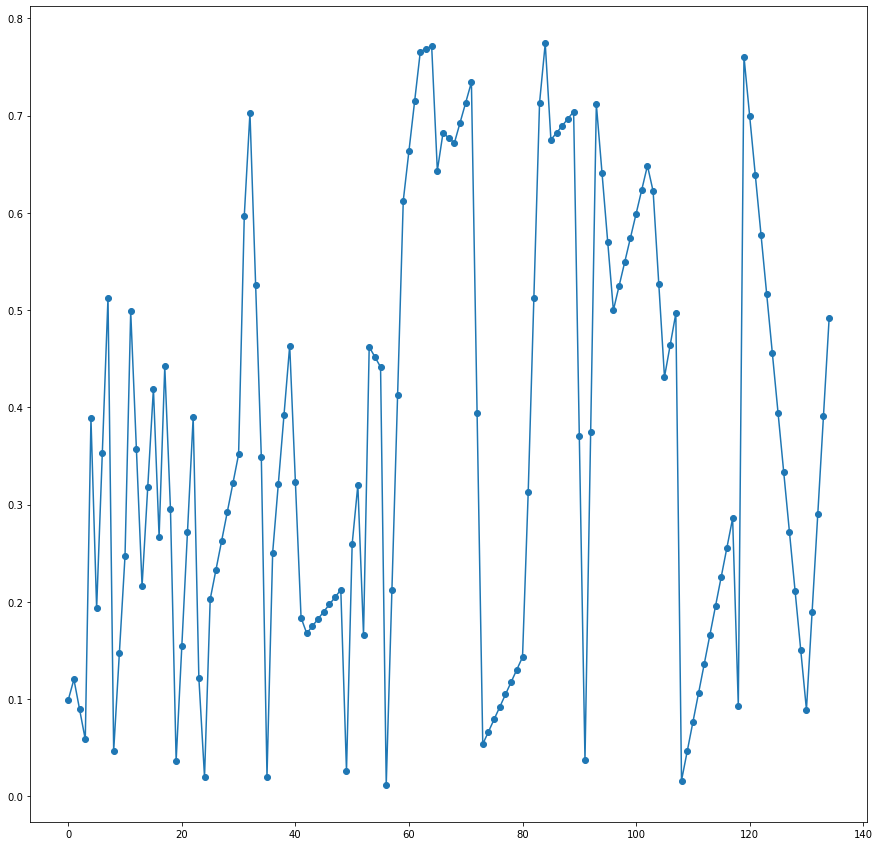

In [206]:
linear_interpolation.plot(marker='o')

In [209]:
linear_interpolation.sum()/len(linear_interpolation)

0.3654288657913949

In [210]:
len(linear_interpolation)

135

<AxesSubplot:>

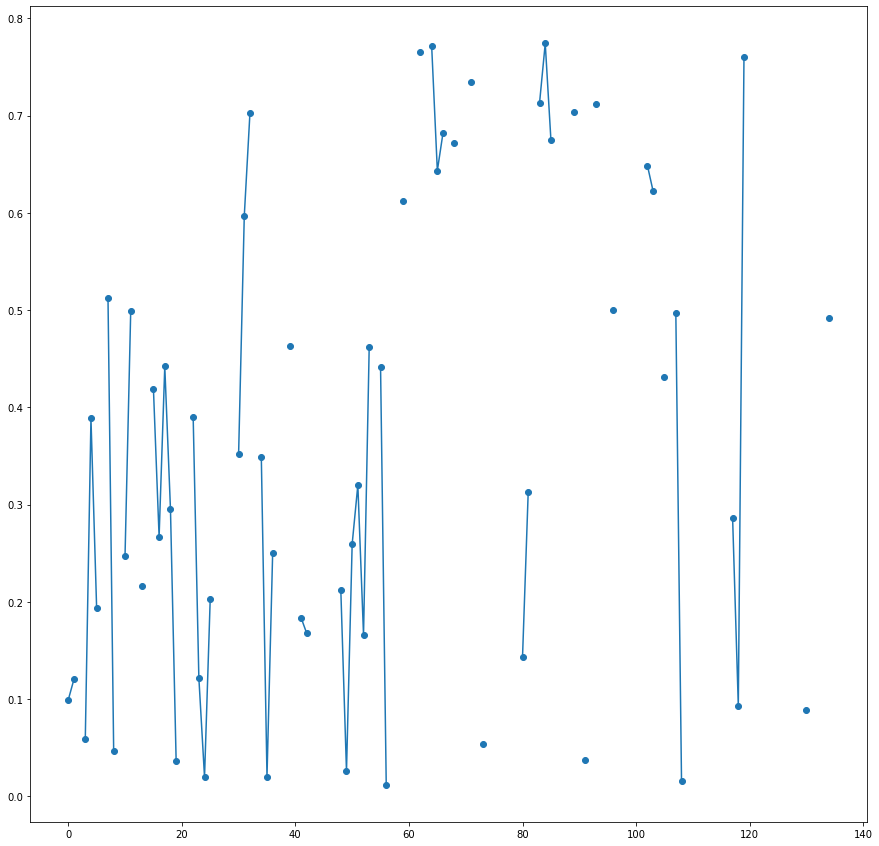

In [200]:
pd.Series(ts_merged).plot(marker='o')

<AxesSubplot:>

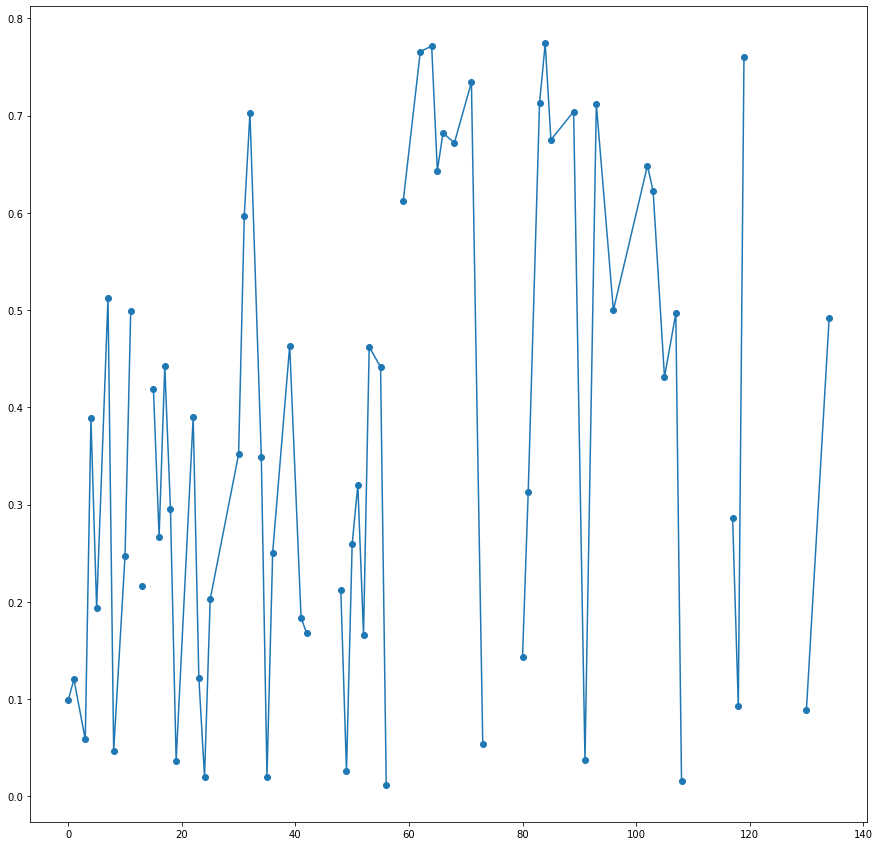

In [162]:
ts_merged.plot(marker='o')

In [16]:
id(df_test_)

2474953617616

In [17]:
id(df_test)

2474860512688

In [24]:
rows, cols = df_test_.shape
print(rows, cols)

2100 73


In [21]:
df_test_.drop(['.geo'], axis=1)

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,3961,15,0.570259,0.311567,0.158459,0.000000,0.410445,0.000000,0.268443,0.000000,...,0.112668,0.000000,0.508451,0.473916,0.000000,0.225841,0.000000,0.095615,0.000000,0.377496
1,811,13,0.099120,0.120262,0.058465,0.512710,0.498558,0.216236,0.419240,0.266971,...,0.011926,0.312531,0.000000,0.491863,0.295682,0.212321,0.143153,0.285811,0.089097,0.463397
2,2471,33,0.284628,0.270622,0.306984,0.358121,0.171494,0.355236,0.265694,0.015629,...,0.000000,0.696087,0.381593,0.334549,0.130732,0.098730,0.000000,0.000000,0.000000,0.017715
3,3950,26,0.000000,0.134871,0.031266,0.071576,0.265254,0.393184,0.288366,0.228679,...,0.378901,0.078180,0.260400,0.000000,0.000000,0.520998,0.105649,0.192649,0.039076,0.000000
4,414,33,0.274234,0.247413,0.334272,0.135544,0.053176,0.019014,0.337644,0.319347,...,0.218645,0.020747,0.000000,0.086551,0.000000,0.057502,0.188022,0.000000,0.074508,0.272411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,5201,26,0.000000,0.260753,0.006954,0.120993,0.467033,0.445326,0.146015,0.063204,...,0.000000,0.223751,0.210844,0.517039,0.088939,0.241273,0.320513,0.086228,0.148027,0.027976
2096,5465,45,0.218513,0.060567,0.285673,0.117278,0.056938,0.199099,0.015916,0.419855,...,0.000000,0.090219,0.014709,0.193550,0.483700,0.000000,0.735950,0.215911,0.718564,0.292793
2097,6640,48,0.008660,0.222891,0.475024,0.507930,0.305147,0.360971,0.000000,0.300393,...,0.037657,0.000000,0.148410,0.283431,0.377793,0.400217,0.259843,0.062095,0.270994,0.523561
2098,2402,133,0.026481,0.289413,0.249596,0.243610,0.183115,0.286295,0.141304,0.266499,...,0.155262,0.000000,0.315290,0.303863,0.000000,0.176415,0.287135,0.299178,0.224451,0.006830


In [27]:
def impute_zeros(df_in):
    rows, cols = df_in.shape
    
    # TODO: может можно как-то векторизовать или через lambda function?
    for row in range(rows):
        for col in range(3, cols):
            # Заменяем пропущенное значение на предыдущее
            if df_in.iloc[row, col] == 0:
                df_in.iloc[row, col] = df_in.iloc[row, col-1]
    
    # для первого столбца заменяем нулевые на значения из следующего столбца
    for row in range(rows):
        if df_in.iloc[row, 2] == 0:
            df_in.iloc[row, 2] = df_in.iloc[row, 3]
    
    return df_in

In [39]:
df_test_dezero = impute_zeros(df_test_)
df_test_dezero = impute_zeros(df_test_dezero)

In [41]:
# Ещё какие-то остались, видимо вручную надо вычищать
(df_test_dezero == 0.0).sum(axis=1).sum()

71

In [42]:
(~df_test_dezero[df_test_dezero==0.0].isna()).sum()

id                     0
area                   0
nd_mean_2021-04-15    32
nd_mean_2021-04-16    32
nd_mean_2021-04-18     7
                      ..
nd_mean_2021-06-02     0
nd_mean_2021-07-04     0
nd_mean_2021-08-10     0
nd_mean_2021-08-23     0
nd_mean_2021-05-24     0
Length: 73, dtype: int64

In [44]:
df.columns

Index(['id', 'area', 'nd_mean_2021-04-15', 'nd_mean_2021-04-16',
       'nd_mean_2021-04-18', 'nd_mean_2021-04-22', 'nd_mean_2021-04-26',
       'nd_mean_2021-04-28', 'nd_mean_2021-04-30', 'nd_mean_2021-05-01',
       'nd_mean_2021-05-02', 'nd_mean_2021-05-08', 'nd_mean_2021-05-15',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-26',
       'nd_mean_2021-05-27', 'nd_mean_2021-05-29', 'nd_mean_2021-06-07',
       'nd_mean_2021-06-18', 'nd_mean_2021-06-19', 'nd_mean_2021-06-20',
       'nd_mean_2021-06-22', 'nd_mean_2021-06-25', 'nd_mean_2021-06-27',
       'nd_mean_2021-07-07', 'nd_mean_2021-07-08', 'nd_mean_2021-07-09',
       'nd_mean_2021-07-13', 'nd_mean_2021-07-15', 'nd_mean_2021-07-17',
       'nd_mean_2021-07-20', 'nd_mean_2021-07-26', 'nd_mean_2021-07-27',
       'nd_mean_2021-07-29', 'nd_mean_2021-07-31', 'nd_mean_2021-08-01',
       'nd_mean_2021-08-07', 'nd_mean_2021-08-12', '.geo',
       'nd_mean_2021-04-19', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',


# Усреднение временных рядов по типам с/х культур

In [7]:
df_train_lint = pd.read_csv(PROC_DIR + "df_train_proc.linterp.1.csv")
df_train_lint

,id,.geo,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,3536,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",3,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,3739,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",4,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,1294,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,2859,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",5,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,3685,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",6,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,5191,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",6,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,5226,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",6,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,5390,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",5,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151


In [8]:
df_test_lint = pd.read_csv(PROC_DIR + "df_test_proc.linterp.1.csv")
df_test_lint

,id,.geo,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,611,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,6417,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,3352,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,4224,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,3102,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,"{""type"":""Polygon"",""coordinates"":[[[38.68082436...",0.225092,0.212900,0.200708,0.188515,0.017866,0.099791,0.156175,0.212560,...,0.222629,0.251595,0.280560,0.309525,0.338491,0.367456,0.303813,0.240171,0.176528,0.112885
2067,3968,"{""type"":""Polygon"",""coordinates"":[[[56.32489418...",0.288768,0.010670,0.147323,0.283976,0.105135,0.308051,0.239447,0.170843,...,0.362426,0.320375,0.278325,0.236274,0.194223,0.152172,0.241991,0.331810,0.421628,0.511447
2068,3809,"{""type"":""Polygon"",""coordinates"":[[[37.89523772...",0.131978,0.131978,0.107483,0.082987,0.058492,0.241415,0.424339,0.607262,...,0.094072,0.111189,0.128305,0.145422,0.162539,0.179656,0.153932,0.128208,0.102484,0.076760
2069,5485,"{""type"":""Polygon"",""coordinates"":[[[38.98573772...",0.044726,0.044726,0.039618,0.034510,0.093328,0.126618,0.157688,0.188758,...,0.043491,0.044103,0.044714,0.045326,0.045937,0.046549,0.044371,0.042193,0.040015,0.037837


In [9]:
ts_cols =[x for x in df_train_lint.columns[df_train_lint.columns.str.contains('nd_mean')].sort_values()]
ts_cols[:10]

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-17',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-20',
 'nd_mean_2021-04-21',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-23',
 'nd_mean_2021-04-24']

In [15]:
df_train_lint_ts = df_train_lint[ts_cols + ['crop']].copy()
df_train_lint_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27,crop
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770,3
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612,4
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127,2
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900,5
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464,6
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182,6
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505,6
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151,5


In [17]:
df_test_lint_ts = df_test_lint[ts_cols].copy()
df_test_lint_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,0.064947,0.065696,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,0.108175,0.095023,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,0.374026,0.258776,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,0.015033,0.040169,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,0.147373,0.125478,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.225092,0.212900,0.200708,0.188515,0.017866,0.099791,0.156175,0.212560,0.217212,0.221864,...,0.222629,0.251595,0.280560,0.309525,0.338491,0.367456,0.303813,0.240171,0.176528,0.112885
2067,0.288768,0.010670,0.147323,0.283976,0.105135,0.308051,0.239447,0.170843,0.010864,0.026474,...,0.362426,0.320375,0.278325,0.236274,0.194223,0.152172,0.241991,0.331810,0.421628,0.511447
2068,0.131978,0.131978,0.107483,0.082987,0.058492,0.241415,0.424339,0.607262,0.254509,0.174296,...,0.094072,0.111189,0.128305,0.145422,0.162539,0.179656,0.153932,0.128208,0.102484,0.076760
2069,0.044726,0.044726,0.039618,0.034510,0.093328,0.126618,0.157688,0.188758,0.097723,0.170870,...,0.043491,0.044103,0.044714,0.045326,0.045937,0.046549,0.044371,0.042193,0.040015,0.037837


In [31]:
df_avg_ts = df_train_lint_ts.groupby('crop').mean()
df_avg_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
crop,,,,,,,,,,,,,,,,,,,,,
0,0.189059,0.217794,0.202844,0.187895,0.111272,0.103539,0.137582,0.171626,0.112678,0.114645,...,0.135653,0.130432,0.125212,0.119992,0.114771,0.109551,0.107899,0.106247,0.104595,0.102943
1,0.099179,0.101442,0.099703,0.097963,0.104973,0.108502,0.171609,0.234716,0.112786,0.107653,...,0.281865,0.304459,0.327053,0.349647,0.372240,0.394834,0.335917,0.276999,0.218082,0.159165
2,0.126613,0.200048,0.156612,0.113175,0.149215,0.113248,0.154476,0.195705,0.112989,0.117329,...,0.124513,0.120747,0.116981,0.113215,0.109449,0.105683,0.105337,0.104990,0.104644,0.104297
3,0.196849,0.121292,0.166469,0.211645,0.171584,0.201561,0.160454,0.119348,0.161639,0.153652,...,0.276693,0.251624,0.226554,0.201485,0.176416,0.151346,0.187150,0.222954,0.258757,0.294561
4,0.167195,0.190137,0.181869,0.173602,0.164107,0.119626,0.169683,0.219740,0.122088,0.144155,...,0.141290,0.134090,0.126890,0.119691,0.112491,0.105292,0.104676,0.104061,0.103446,0.102831
5,0.244311,0.219124,0.232056,0.244988,0.130545,0.244124,0.177937,0.111749,0.104429,0.105539,...,0.225989,0.238422,0.250856,0.263289,0.275722,0.288155,0.307362,0.326569,0.345775,0.364982
6,0.101575,0.105302,0.108989,0.112676,0.170915,0.110632,0.132693,0.154755,0.115186,0.132024,...,0.217770,0.221803,0.225836,0.229870,0.233903,0.237937,0.210683,0.183430,0.156177,0.128924


In [29]:
df_train_lint_ts[df_train_lint_ts.crop==0].mean()

nd_mean_2021-04-15    0.189059
nd_mean_2021-04-16    0.217794
nd_mean_2021-04-17    0.202844
nd_mean_2021-04-18    0.187895
nd_mean_2021-04-19    0.111272
                        ...   
nd_mean_2021-08-24    0.107899
nd_mean_2021-08-25    0.106247
nd_mean_2021-08-26    0.104595
nd_mean_2021-08-27    0.102943
crop                  0.000000
Length: 136, dtype: float64

In [30]:
df_train_lint_ts[df_train_lint_ts.crop==6].mean()

nd_mean_2021-04-15    0.101575
nd_mean_2021-04-16    0.105302
nd_mean_2021-04-17    0.108989
nd_mean_2021-04-18    0.112676
nd_mean_2021-04-19    0.170915
                        ...   
nd_mean_2021-08-24    0.210683
nd_mean_2021-08-25    0.183430
nd_mean_2021-08-26    0.156177
nd_mean_2021-08-27    0.128924
crop                  6.000000
Length: 136, dtype: float64

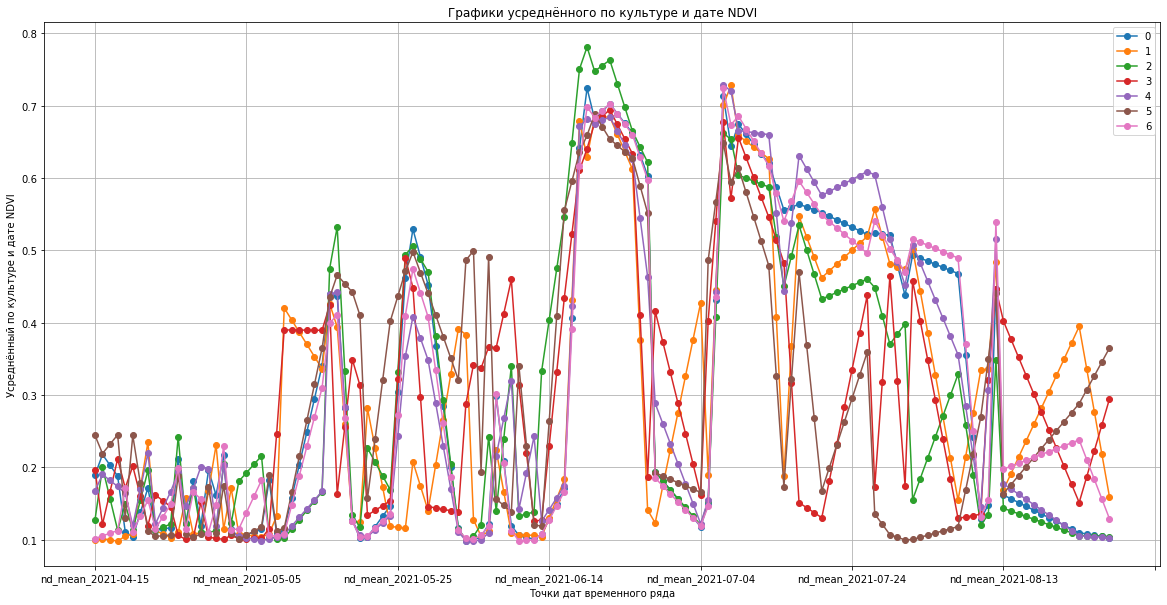

In [193]:
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for crop in range(7):
    df_avg_ts.iloc[crop, :].plot(marker='o', fig=fig, ax=ax)

ax.legend()
ax.grid()
ax.set_xlabel('Точки дат временного ряда')
ax.set_ylabel('Усреднённый по культуре и дате NDVI')
ax.set_title('Графики усреднённого по культуре и дате NDVI')
fig.savefig(OUT_DIR + 'NDVI_avg.png')

Может быть убрать точки до 2021-05-05 ? Уж больно скачут
На test и prod результат ухудшился.

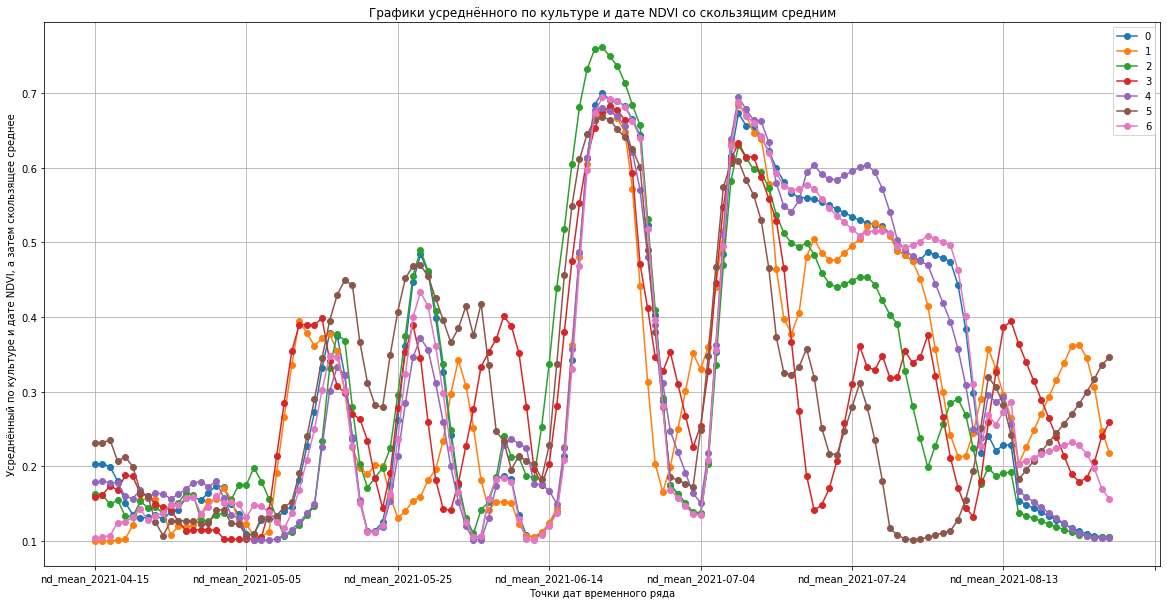

In [194]:
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for crop in range(7):
    df_avg_ts.iloc[crop, :].rolling(window=4, center=True, min_periods=2).mean().plot(marker='o', fig=fig, ax=ax)

ax.legend()
ax.grid()
ax.set_xlabel('Точки дат временного ряда')
ax.set_ylabel('Усреднённый по культуре и дате NDVI, а затем скользящее среднее')
ax.set_title('Графики усреднённого по культуре и дате NDVI со скользящим средним')
fig.savefig(OUT_DIR + 'NDVI_avg_rolling_mean.png')

In [196]:
df_avg_roll_mean_ts = df_avg_ts.copy()
df_avg_roll_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
crop,,,,,,,,,,,,,,,,,,,,,
0,0.189059,0.217794,0.202844,0.187895,0.111272,0.103539,0.137582,0.171626,0.112678,0.114645,...,0.135653,0.130432,0.125212,0.119992,0.114771,0.109551,0.107899,0.106247,0.104595,0.102943
1,0.099179,0.101442,0.099703,0.097963,0.104973,0.108502,0.171609,0.234716,0.112786,0.107653,...,0.281865,0.304459,0.327053,0.349647,0.372240,0.394834,0.335917,0.276999,0.218082,0.159165
2,0.126613,0.200048,0.156612,0.113175,0.149215,0.113248,0.154476,0.195705,0.112989,0.117329,...,0.124513,0.120747,0.116981,0.113215,0.109449,0.105683,0.105337,0.104990,0.104644,0.104297
3,0.196849,0.121292,0.166469,0.211645,0.171584,0.201561,0.160454,0.119348,0.161639,0.153652,...,0.276693,0.251624,0.226554,0.201485,0.176416,0.151346,0.187150,0.222954,0.258757,0.294561
4,0.167195,0.190137,0.181869,0.173602,0.164107,0.119626,0.169683,0.219740,0.122088,0.144155,...,0.141290,0.134090,0.126890,0.119691,0.112491,0.105292,0.104676,0.104061,0.103446,0.102831
5,0.244311,0.219124,0.232056,0.244988,0.130545,0.244124,0.177937,0.111749,0.104429,0.105539,...,0.225989,0.238422,0.250856,0.263289,0.275722,0.288155,0.307362,0.326569,0.345775,0.364982
6,0.101575,0.105302,0.108989,0.112676,0.170915,0.110632,0.132693,0.154755,0.115186,0.132024,...,0.217770,0.221803,0.225836,0.229870,0.233903,0.237937,0.210683,0.183430,0.156177,0.128924


In [203]:
for crop in range(7):
    df_avg_roll_mean_ts.iloc[crop, :] = df_avg_roll_mean_ts.iloc[crop, :].rolling(
        window=4, center=True, min_periods=2).mean()

df_avg_roll_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
crop,,,,,,,,,,,,,,,,,,,,,
0,0.203329,0.202019,0.196502,0.183492,0.166452,0.149354,0.137205,0.132891,0.131346,0.133298,...,0.140873,0.135653,0.130432,0.125212,0.120215,0.115663,0.111781,0.108791,0.106677,0.105697
1,0.100209,0.099997,0.100253,0.100871,0.106035,0.119880,0.133850,0.147327,0.151991,0.140315,...,0.259271,0.281865,0.304459,0.327053,0.344552,0.351863,0.343890,0.315539,0.279270,0.257360
2,0.162211,0.157844,0.157074,0.149507,0.142366,0.143379,0.140714,0.143730,0.144828,0.143696,...,0.128279,0.124513,0.120747,0.116981,0.113429,0.110304,0.107820,0.106192,0.105247,0.104875
3,0.160304,0.164890,0.165605,0.172791,0.178984,0.176278,0.174528,0.164768,0.154459,0.149087,...,0.301763,0.276693,0.251624,0.226554,0.205290,0.191634,0.189392,0.202368,0.222283,0.234888
4,0.179200,0.178867,0.178507,0.173791,0.168046,0.165568,0.160657,0.161686,0.163260,0.160285,...,0.148489,0.141290,0.134090,0.126890,0.120102,0.114137,0.109407,0.106322,0.104550,0.103856
5,0.231774,0.232889,0.226336,0.221639,0.213531,0.196273,0.184494,0.162490,0.139413,0.129472,...,0.213556,0.225989,0.238422,0.250856,0.263712,0.277415,0.292389,0.309055,0.324591,0.332971
6,0.104364,0.105288,0.110083,0.115674,0.122284,0.131063,0.132024,0.133990,0.135484,0.137088,...,0.213736,0.217770,0.221803,0.225836,0.227914,0.226082,0.218382,0.202862,0.184881,0.174346


In [102]:
df_train_lint_ts[df_train_lint_ts.columns[df_train_lint_ts.columns > 'nd_mean_2021-05-04']]

,nd_mean_2021-05-05,nd_mean_2021-05-06,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-11,nd_mean_2021-05-12,nd_mean_2021-05-13,nd_mean_2021-05-14,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.121257,0.083790,0.046323,0.008857,0.102757,0.213006,0.242066,0.271125,0.300185,0.329244,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,0.147997,0.155669,0.163340,0.113071,0.136934,0.160796,0.134858,0.108919,0.082981,0.057042,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,0.193802,0.350159,0.506516,0.007437,0.028961,0.151504,0.121764,0.092023,0.062282,0.032542,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,0.053428,0.048516,0.043604,0.327677,0.052864,0.099087,0.161753,0.224419,0.287085,0.349751,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,0.203349,0.152414,0.101479,0.054223,0.024860,0.066768,0.053745,0.040723,0.027700,0.014677,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.053408,0.035132,0.016856,0.017705,0.013175,0.149278,0.139529,0.129780,0.120030,0.110281,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,0.272220,0.279259,0.286298,0.048316,0.074903,0.149736,0.133878,0.118021,0.102164,0.086306,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,0.194942,0.297191,0.399439,0.051215,0.003097,0.163403,0.137212,0.111020,0.084829,0.058638,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,0.136120,0.159838,0.183555,0.177987,0.172419,0.166851,0.243329,0.319806,0.396284,0.472761,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151


In [221]:
df_test_lint_ts.apply(lambda row: row.rolling(window=4, min_periods=2, center=True).mean())

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.102754,0.143941,0.193428,0.242915,0.227162,0.211409,0.201986,0.192563,0.086561,0.080360,...,0.266863,0.232449,0.198035,0.163620,0.129206,0.094792,0.095237,0.095681,0.096126,0.096571
1,0.154952,0.186648,0.223877,0.261106,0.162564,0.180028,0.201711,0.223394,0.182383,0.139832,...,0.204860,0.184784,0.164709,0.144634,0.124559,0.104484,0.107648,0.110812,0.113976,0.117140
2,0.157766,0.167797,0.203199,0.238602,0.172176,0.155992,0.166517,0.177042,0.140545,0.114916,...,0.233887,0.229429,0.224972,0.220514,0.216057,0.211599,0.195522,0.179445,0.163368,0.147291
3,0.139722,0.126057,0.160161,0.194265,0.170159,0.148952,0.151742,0.154533,0.161152,0.129862,...,0.223892,0.250719,0.277546,0.304373,0.331200,0.358027,0.307662,0.257296,0.206931,0.156565
4,0.129039,0.131159,0.145223,0.159287,0.129899,0.134712,0.143377,0.152043,0.173932,0.134584,...,0.231602,0.254626,0.277651,0.300675,0.323700,0.346724,0.292556,0.238388,0.184220,0.130052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.224014,0.088488,0.146452,0.204415,0.064385,0.194127,0.208140,0.222152,0.160445,0.137370,...,0.270941,0.271033,0.271125,0.271218,0.271310,0.271402,0.284050,0.296697,0.309345,0.321993
2067,0.196032,0.092943,0.122516,0.152089,0.061753,0.183273,0.248335,0.313396,0.208761,0.158813,...,0.220135,0.215678,0.211221,0.206764,0.202307,0.197851,0.207934,0.218017,0.228100,0.238183
2068,0.172641,0.100069,0.123783,0.147497,0.068705,0.193969,0.244412,0.294855,0.145077,0.148376,...,0.180655,0.181815,0.182976,0.184137,0.185297,0.186458,0.186027,0.185595,0.185164,0.184732
2069,0.151282,0.074040,0.093085,0.112130,0.065193,0.234716,0.256903,0.279091,0.115540,0.133470,...,0.144142,0.139323,0.134503,0.129684,0.124865,0.120046,0.135525,0.151004,0.166483,0.181962


In [225]:
df_test_lint_rol_mean_ts = df_test_lint_ts.copy()
df_test_lint_rol_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,0.064947,0.065696,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,0.108175,0.095023,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,0.374026,0.258776,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,0.015033,0.040169,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,0.147373,0.125478,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.225092,0.212900,0.200708,0.188515,0.017866,0.099791,0.156175,0.212560,0.217212,0.221864,...,0.222629,0.251595,0.280560,0.309525,0.338491,0.367456,0.303813,0.240171,0.176528,0.112885
2067,0.288768,0.010670,0.147323,0.283976,0.105135,0.308051,0.239447,0.170843,0.010864,0.026474,...,0.362426,0.320375,0.278325,0.236274,0.194223,0.152172,0.241991,0.331810,0.421628,0.511447
2068,0.131978,0.131978,0.107483,0.082987,0.058492,0.241415,0.424339,0.607262,0.254509,0.174296,...,0.094072,0.111189,0.128305,0.145422,0.162539,0.179656,0.153932,0.128208,0.102484,0.076760
2069,0.044726,0.044726,0.039618,0.034510,0.093328,0.126618,0.157688,0.188758,0.097723,0.170870,...,0.043491,0.044103,0.044714,0.045326,0.045937,0.046549,0.044371,0.042193,0.040015,0.037837


In [228]:
df_test_lint_rol_mean_ts = df_test_lint_rol_mean_ts.apply(lambda row: row.rolling(
    window=4, min_periods=2, center=True).mean())
df_test_lint_rol_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.102754,0.143941,0.193428,0.242915,0.227162,0.211409,0.201986,0.192563,0.086561,0.080360,...,0.266863,0.232449,0.198035,0.163620,0.129206,0.094792,0.095237,0.095681,0.096126,0.096571
1,0.154952,0.186648,0.223877,0.261106,0.162564,0.180028,0.201711,0.223394,0.182383,0.139832,...,0.204860,0.184784,0.164709,0.144634,0.124559,0.104484,0.107648,0.110812,0.113976,0.117140
2,0.157766,0.167797,0.203199,0.238602,0.172176,0.155992,0.166517,0.177042,0.140545,0.114916,...,0.233887,0.229429,0.224972,0.220514,0.216057,0.211599,0.195522,0.179445,0.163368,0.147291
3,0.139722,0.126057,0.160161,0.194265,0.170159,0.148952,0.151742,0.154533,0.161152,0.129862,...,0.223892,0.250719,0.277546,0.304373,0.331200,0.358027,0.307662,0.257296,0.206931,0.156565
4,0.129039,0.131159,0.145223,0.159287,0.129899,0.134712,0.143377,0.152043,0.173932,0.134584,...,0.231602,0.254626,0.277651,0.300675,0.323700,0.346724,0.292556,0.238388,0.184220,0.130052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.224014,0.088488,0.146452,0.204415,0.064385,0.194127,0.208140,0.222152,0.160445,0.137370,...,0.270941,0.271033,0.271125,0.271218,0.271310,0.271402,0.284050,0.296697,0.309345,0.321993
2067,0.196032,0.092943,0.122516,0.152089,0.061753,0.183273,0.248335,0.313396,0.208761,0.158813,...,0.220135,0.215678,0.211221,0.206764,0.202307,0.197851,0.207934,0.218017,0.228100,0.238183
2068,0.172641,0.100069,0.123783,0.147497,0.068705,0.193969,0.244412,0.294855,0.145077,0.148376,...,0.180655,0.181815,0.182976,0.184137,0.185297,0.186458,0.186027,0.185595,0.185164,0.184732
2069,0.151282,0.074040,0.093085,0.112130,0.065193,0.234716,0.256903,0.279091,0.115540,0.133470,...,0.144142,0.139323,0.134503,0.129684,0.124865,0.120046,0.135525,0.151004,0.166483,0.181962


In [231]:
df_train_lint_rol_mean_ts = df_train_lint_ts.copy()
df_train_lint_rol_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27,crop
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770,3
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612,4
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127,2
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900,5
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464,6
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182,6
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505,6
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151,5


In [232]:
df_train_lint_rol_mean_ts.iloc[:, :-1] = df_train_lint_rol_mean_ts.iloc[:, :-1].apply(lambda row: row.rolling(
    window=4, min_periods=2, center=True).mean())
df_train_lint_rol_mean_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27,crop
0,0.216218,0.202887,0.254301,0.305716,0.274480,0.063903,0.071981,0.080059,0.046193,0.085885,...,0.124287,0.119856,0.115425,0.110995,0.106564,0.179220,0.251877,0.324534,0.397191,3
1,0.146275,0.139817,0.173358,0.206898,0.185338,0.057592,0.075616,0.093641,0.068286,0.082960,...,0.107849,0.104027,0.100204,0.096382,0.092559,0.140128,0.187698,0.235267,0.282836,4
2,0.183063,0.131357,0.183021,0.234686,0.152129,0.081619,0.076164,0.070710,0.062478,0.076926,...,0.097503,0.094343,0.091183,0.088023,0.084863,0.140361,0.195858,0.251355,0.306852,2
3,0.143271,0.145867,0.172142,0.198418,0.102557,0.075977,0.068523,0.061069,0.086488,0.092907,...,0.098696,0.094450,0.090204,0.085958,0.081712,0.100327,0.118942,0.137557,0.156172,5
4,0.162105,0.132663,0.160385,0.188107,0.094706,0.152976,0.116714,0.080453,0.127552,0.092711,...,0.100697,0.102396,0.104094,0.105793,0.107492,0.132051,0.156611,0.181171,0.205731,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.157690,0.076960,0.080142,0.083323,0.045786,0.123773,0.163018,0.202264,0.089260,0.088698,...,0.086942,0.091878,0.096814,0.101750,0.106686,0.093792,0.080898,0.068003,0.055109,6
4826,0.132369,0.069739,0.055305,0.040871,0.040347,0.144288,0.167700,0.191112,0.091648,0.113026,...,0.170745,0.192234,0.213724,0.235213,0.256703,0.211067,0.165432,0.119796,0.074160,6
4827,0.175427,0.136841,0.113858,0.090875,0.088503,0.193182,0.151161,0.109139,0.069154,0.099778,...,0.190575,0.216618,0.242661,0.268704,0.294747,0.262642,0.230536,0.198431,0.166325,6
4828,0.225129,0.186379,0.153851,0.121323,0.089702,0.202049,0.131004,0.059959,0.068273,0.082550,...,0.236980,0.246962,0.256945,0.266927,0.276909,0.253896,0.230882,0.207869,0.184856,5


In [236]:
df_test

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.000000,0.039850,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000
2,3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,0.031273,...,0.076965,0.045298,0.000000,0.114008,0.059159,0.058423,0.108990,0.237742,0.000000,0.000000
4,3102,53,0.000000,0.234954,0.000000,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.000000,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,0.000000,0.017866,0.212560,0.231169,0.012535,0.000000,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,0.000000,0.000000,0.000000,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.000000,0.545505,...,0.203868,0.031249,0.000000,0.000000,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,0.000000,0.000000,0.000000,0.053296,0.200393,0.000000,0.040434,0.037837,0.000000,0.165996


In [243]:
pd.concat([df.loc[:, ['id','area', '.geo', 'crop']], df_train_lint_rol_mean_ts],
          axis=1).to_csv(f'{PROC_DIR}/train_rol_mean_full_ts.csv', sep=',', index=None)

In [244]:
pd.concat([df_test.loc[:, ['id','area','.geo']], df_test_lint_rol_mean_ts],
          axis=1).to_csv(f'{PROC_DIR}/test_rol_mean_full_ts.csv', sep=',', index=None)

In [253]:
(df_test_lint_ts.sum(axis = 1)/135).to_csv(f'{PROC_DIR}/test_full_ts_sum_normalized.csv', sep=',', index=None)

In [257]:
(df_train_lint_ts.iloc[:, :-1].sum(axis = 1)/135).to_csv(f'{PROC_DIR}/train_full_ts_sum_normalized.csv', sep=',', index=None)

In [258]:
df_train_lint_ts.iloc[:, :-1]

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151


In [256]:
df_train_lint_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27,crop
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770,3
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612,4
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127,2
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900,5
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464,6
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182,6
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505,6
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151,5


In [265]:
(df_test.iloc[:, :-1]==0).sum()

id                      0
area                    0
nd_mean_2021-04-16    240
nd_mean_2021-04-19    326
nd_mean_2021-04-22    209
                     ... 
nd_mean_2021-06-10    332
nd_mean_2021-07-05    366
nd_mean_2021-08-13    367
nd_mean_2021-08-27    350
nd_mean_2021-05-08    324
Length: 72, dtype: int64

In [293]:
df_test.mask(df_test.iloc[:, :-1]==0, inplace=True)
df_test

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,NaN,0.259303,0.052522,0.133353,NaN,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,NaN,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,NaN,0.125823,NaN,0.027636,0.433244,0.344155,0.461029,...,0.064743,NaN,0.039850,0.067910,0.084682,0.025694,NaN,0.108945,0.141947,0.000000
2,3352,21,NaN,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,NaN,NaN,0.107940,NaN,0.213204,0.031273,...,0.076965,0.045298,NaN,0.114008,0.059159,0.058423,0.108990,0.237742,NaN,0.000000
4,3102,53,NaN,0.234954,NaN,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,NaN,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,NaN,0.017866,0.212560,0.231169,0.012535,NaN,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,NaN,NaN,NaN,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,NaN,0.545505,...,0.203868,0.031249,NaN,NaN,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,NaN,NaN,NaN,0.053296,0.200393,NaN,0.040434,0.037837,NaN,0.165996


In [294]:
df_test.isna().sum().sum()

17434

In [295]:
df_test.iloc[:, :-1] = df_test.iloc[:, :-1].fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
df_test

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.259303,0.259303,0.052522,0.133353,0.058353,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.200005,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.125823,0.125823,0.027636,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.039850,0.039850,0.067910,0.084682,0.025694,0.108945,0.108945,0.141947,0.000000
2,3352,21,0.033368,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.107940,0.107940,0.107940,0.213204,0.213204,0.031273,...,0.076965,0.045298,0.114008,0.114008,0.059159,0.058423,0.108990,0.237742,0.237742,0.000000
4,3102,53,0.234954,0.234954,0.305964,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.048622,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,0.017866,0.017866,0.212560,0.231169,0.012535,0.103303,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,0.258106,0.258106,0.258106,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.545505,0.545505,...,0.203868,0.031249,0.055619,0.055619,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,0.053296,0.053296,0.053296,0.053296,0.200393,0.040434,0.040434,0.037837,0.037837,0.165996


In [296]:
df_test.isna().sum().sum()

0

In [311]:
df_test.loc[:, ~df_test.columns.isin(['.geo'])]

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.259303,0.259303,0.052522,0.133353,0.058353,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.200005,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.125823,0.125823,0.027636,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.039850,0.039850,0.067910,0.084682,0.025694,0.108945,0.108945,0.141947,0.000000
2,3352,21,0.033368,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.107940,0.107940,0.107940,0.213204,0.213204,0.031273,...,0.076965,0.045298,0.114008,0.114008,0.059159,0.058423,0.108990,0.237742,0.237742,0.000000
4,3102,53,0.234954,0.234954,0.305964,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.048622,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,0.017866,0.017866,0.212560,0.231169,0.012535,0.103303,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,0.258106,0.258106,0.258106,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.545505,0.545505,...,0.203868,0.031249,0.055619,0.055619,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,0.053296,0.053296,0.053296,0.053296,0.200393,0.040434,0.040434,0.037837,0.037837,0.165996


<AxesSubplot:>

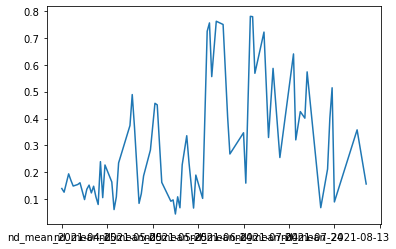

In [233]:
df_test_lint_rol_mean_ts.loc[3, :].plot()

<AxesSubplot:>

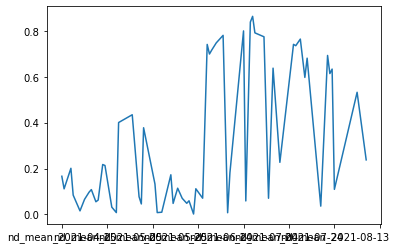

In [224]:
df_test_lint_ts.loc[3, :].plot()

In [126]:
from scipy.stats.stats import pearsonr

In [211]:
ts_corr_matrix = np.zeros([df_train_lint_ts.shape[0], 7])
ts_corr_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [214]:
for idx, row in enumerate(np.array(df_train_lint_ts.iloc[:, :-1])):
    for crop, ts_crop_avg in enumerate(np.array(df_avg_roll_mean_ts)):
        rol = np.array(pd.Series(row).rolling(window=4, min_periods=2, center=True).mean())
        ts_corr_matrix[idx, crop] = pearsonr(row, ts_crop_avg)[0]

ts_corr_matrix

array([[0.70362343, 0.72103291, 0.60121627, ..., 0.7140788 , 0.37762278,
        0.70788026],
       [0.58909803, 0.4050957 , 0.60871175, ..., 0.55404558, 0.4880382 ,
        0.56759621],
       [0.73687161, 0.59763123, 0.83898028, ..., 0.71291497, 0.60562853,
        0.72714303],
       ...,
       [0.76433343, 0.73750493, 0.66147718, ..., 0.73073235, 0.42732977,
        0.81415366],
       [0.31625722, 0.41775294, 0.47700358, ..., 0.28953006, 0.70631589,
        0.30354658],
       [0.8232408 , 0.79355145, 0.77753784, ..., 0.85458727, 0.53270192,
        0.83071101]])

In [215]:
crops_from_r = np.argmax(ts_corr_matrix, axis=1)
crops_from_r

array([1, 2, 2, ..., 6, 5, 4], dtype=int64)

In [216]:
from sklearn.metrics import recall_score

In [217]:
recall_score(crops_from_r, np.array(df_train_lint_ts.crop), average='macro', zero_division=True)

0.7001680782283428

In [218]:
# 0.7 после скользящего среднего

In [ ]:
# 0.8 всего без особых ухищрений

In [169]:
crops_from_r

array([4, 0, 2, ..., 6, 5, 4], dtype=int64)

In [170]:
pd.DataFrame({'id': df.id, 'crop': np.squeeze(crops_from_r.astype(int))}).to_csv(
        f'{OUT_DIR}/train_corr_out.csv', sep=',', index=None)

In [220]:
df_test_lint_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,0.064947,0.065696,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,0.108175,0.095023,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,0.374026,0.258776,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,0.015033,0.040169,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,0.147373,0.125478,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.225092,0.212900,0.200708,0.188515,0.017866,0.099791,0.156175,0.212560,0.217212,0.221864,...,0.222629,0.251595,0.280560,0.309525,0.338491,0.367456,0.303813,0.240171,0.176528,0.112885
2067,0.288768,0.010670,0.147323,0.283976,0.105135,0.308051,0.239447,0.170843,0.010864,0.026474,...,0.362426,0.320375,0.278325,0.236274,0.194223,0.152172,0.241991,0.331810,0.421628,0.511447
2068,0.131978,0.131978,0.107483,0.082987,0.058492,0.241415,0.424339,0.607262,0.254509,0.174296,...,0.094072,0.111189,0.128305,0.145422,0.162539,0.179656,0.153932,0.128208,0.102484,0.076760
2069,0.044726,0.044726,0.039618,0.034510,0.093328,0.126618,0.157688,0.188758,0.097723,0.170870,...,0.043491,0.044103,0.044714,0.045326,0.045937,0.046549,0.044371,0.042193,0.040015,0.037837


In [171]:
ts_test_corr_matrix = np.zeros([df_test_lint_ts.shape[0], 7])
ts_test_corr_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [188]:
for idx, row in enumerate(np.array(df_test_lint_ts.iloc[:, :])):
    for crop, ts_crop_avg in enumerate(np.array(df_avg_ts)):
        ts_test_corr_matrix[idx, crop] = pearsonr(pd.Series(row).rolling(
            window=8, center=True, min_periods=4).mean(), pd.Series(ts_crop_avg)[0]

ts_test_corr_matrix

TypeError: rolling() got an unexpected keyword argument 'min_period'

In [173]:
crops_test_from_r = np.argmax(ts_test_corr_matrix, axis=1)
crops_test_from_r

array([3, 2, 4, ..., 2, 0, 2], dtype=int64)

In [174]:
pd.DataFrame({'id': df_test.id, 'crop': np.squeeze(crops_test_from_r.astype(int))}).to_csv(
        f'{OUT_DIR}/test_corr_out.csv', sep=',', index=None)

In [177]:
df_train_lint_ts

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27,crop
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770,3
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612,4
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127,2
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900,5
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464,6
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182,6
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505,6
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151,5


<AxesSubplot:>

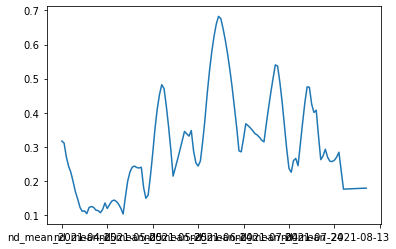

In [185]:
df_train_lint_ts.iloc[1, :-1].rolling(
    window=8,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=4,  # choose about half the window size
).mean().plot()             # compute the mean (could also do median, std, min, max, ...)

In [167]:
df

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,74,0.028770,0.038282,0.255329,0.148166,0.225421,0.479483,0.071684,0.016856,...,0.001875,0.031995,0.066882,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,6
4826,5191,109,0.035939,0.030722,0.033869,0.029646,0.318387,0.247905,0.265180,0.286298,...,0.192014,0.255964,0.131357,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,6
4827,5226,58,0.191255,0.063581,0.140111,0.323984,0.000000,0.005056,0.092693,0.399439,...,0.085006,0.187352,0.142930,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,6
4828,5390,14,0.291399,0.221428,0.007247,0.055074,0.057781,0.187749,0.112403,0.183555,...,0.536825,0.644357,0.085861,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5


<AxesSubplot:>

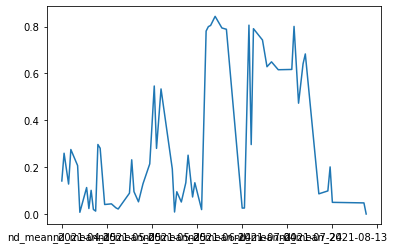

In [37]:
df_train_lint_ts[df_train_lint_ts.crop==0].iloc[0, :].plot()

<AxesSubplot:>

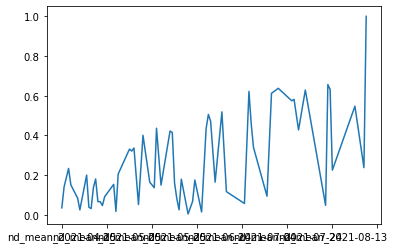

In [38]:
df_train_lint_ts[df_train_lint_ts.crop==1].iloc[0, :].plot()

In [41]:
for crop in range(7):
    print(df_avg_ts.iloc[crop, :].corr(df_train_lint_ts[df_train_lint_ts.crop==1].iloc[0, :]))

0.5267086226569869
0.6676673923410389
0.33904360779453835
0.2053929028005663
0.5620161628228829
0.19050713068003258
0.5905545260783586


In [50]:
pd.Series([.1,.1,.1]).corr(pd.Series([.1,.1,.1]))

1.0

In [48]:
s1 = pd.Series([.2, .0, .6, .2])
s2 = pd.Series([.3, .6, .0, .1])
s1.corr(s2)

-0.85106449634699

In [52]:
pd.DataFrame(df_avg_ts.iloc[crop, :]).corrwith(pd.Series([.1,.1]))

6   NaN
dtype: float64

In [56]:
type(df_avg_ts.iloc[crop, :])

pandas.core.series.Series

In [63]:
df_train_lint_ts[df_train_lint_ts.crop==1].corrwith(df_avg_ts)

nd_mean_2021-04-15   NaN
nd_mean_2021-04-16   NaN
nd_mean_2021-04-17   NaN
nd_mean_2021-04-18   NaN
nd_mean_2021-04-19   NaN
                      ..
nd_mean_2021-08-24   NaN
nd_mean_2021-08-25   NaN
nd_mean_2021-08-26   NaN
nd_mean_2021-08-27   NaN
crop                 NaN
Length: 136, dtype: float64

In [71]:
df_avg_ts.corrwith(df_train_lint_ts)

nd_mean_2021-04-15    0.582446
nd_mean_2021-04-16   -0.182573
nd_mean_2021-04-17    0.009272
nd_mean_2021-04-18    0.378373
nd_mean_2021-04-19   -0.868016
                        ...   
nd_mean_2021-08-24    0.599867
nd_mean_2021-08-25    0.474927
nd_mean_2021-08-26    0.410670
nd_mean_2021-08-27    0.384987
crop                       NaN
Length: 136, dtype: float64

In [75]:
df_train_lint_ts.corrwith(df_avg_ts, axis=0)

nd_mean_2021-04-15    0.582446
nd_mean_2021-04-16   -0.182573
nd_mean_2021-04-17    0.009272
nd_mean_2021-04-18    0.378373
nd_mean_2021-04-19   -0.868016
                        ...   
nd_mean_2021-08-24    0.599867
nd_mean_2021-08-25    0.474927
nd_mean_2021-08-26    0.410670
nd_mean_2021-08-27    0.384987
crop                       NaN
Length: 136, dtype: float64

In [77]:
df_train_lint_ts.iloc[:, :-1]

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-24,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,0.062981,0.067846,0.072711,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,0.097138,0.024539,0.099058,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,0.120804,0.112471,0.077111,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,0.001917,0.045054,0.058822,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,0.024416,0.163886,0.136635,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,0.255329,0.095812,0.168707,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,0.033869,0.029995,0.026120,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,0.140111,0.143922,0.181334,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,0.007247,0.006888,0.022950,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151
